In [32]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

In [33]:
dtrain = pd.read_csv('C:\\EstudosML\\ML distribuído\\UNSW-N15\\Dataset\\UNSW_NB15_training-set.csv')

Text(0.5, 1.0, 'class distribution of train dataset')

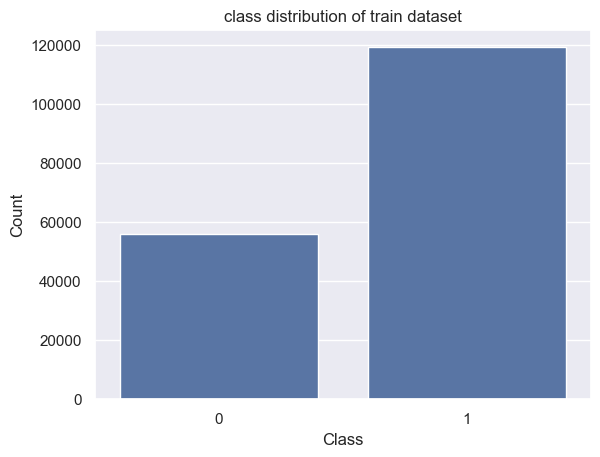

In [34]:
dist = sb.countplot(x='label', data=dtrain)
dist.set(xlabel="Class", ylabel="Count")
plt.title("class distribution of train dataset")

In [35]:
dtrain = dtrain.drop(columns=['id'])
dtrain = dtrain.drop(columns=['attack_cat'])

In [36]:
#Verificando valores nulos
dtrain.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int6

In [37]:
#Verificando valores nulos
dtrain.isnull().sum().sum()

0

In [38]:
dtrain.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


In [39]:
#A coluna service possui valores '-', vamos trocar para None
dtrain['service'] = dtrain['service'].apply(lambda x:"None" if x=="-" else x)

C:\Users\natha\AppData\Local\Temp\ipykernel_34268\566902504.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dtrain.corr()


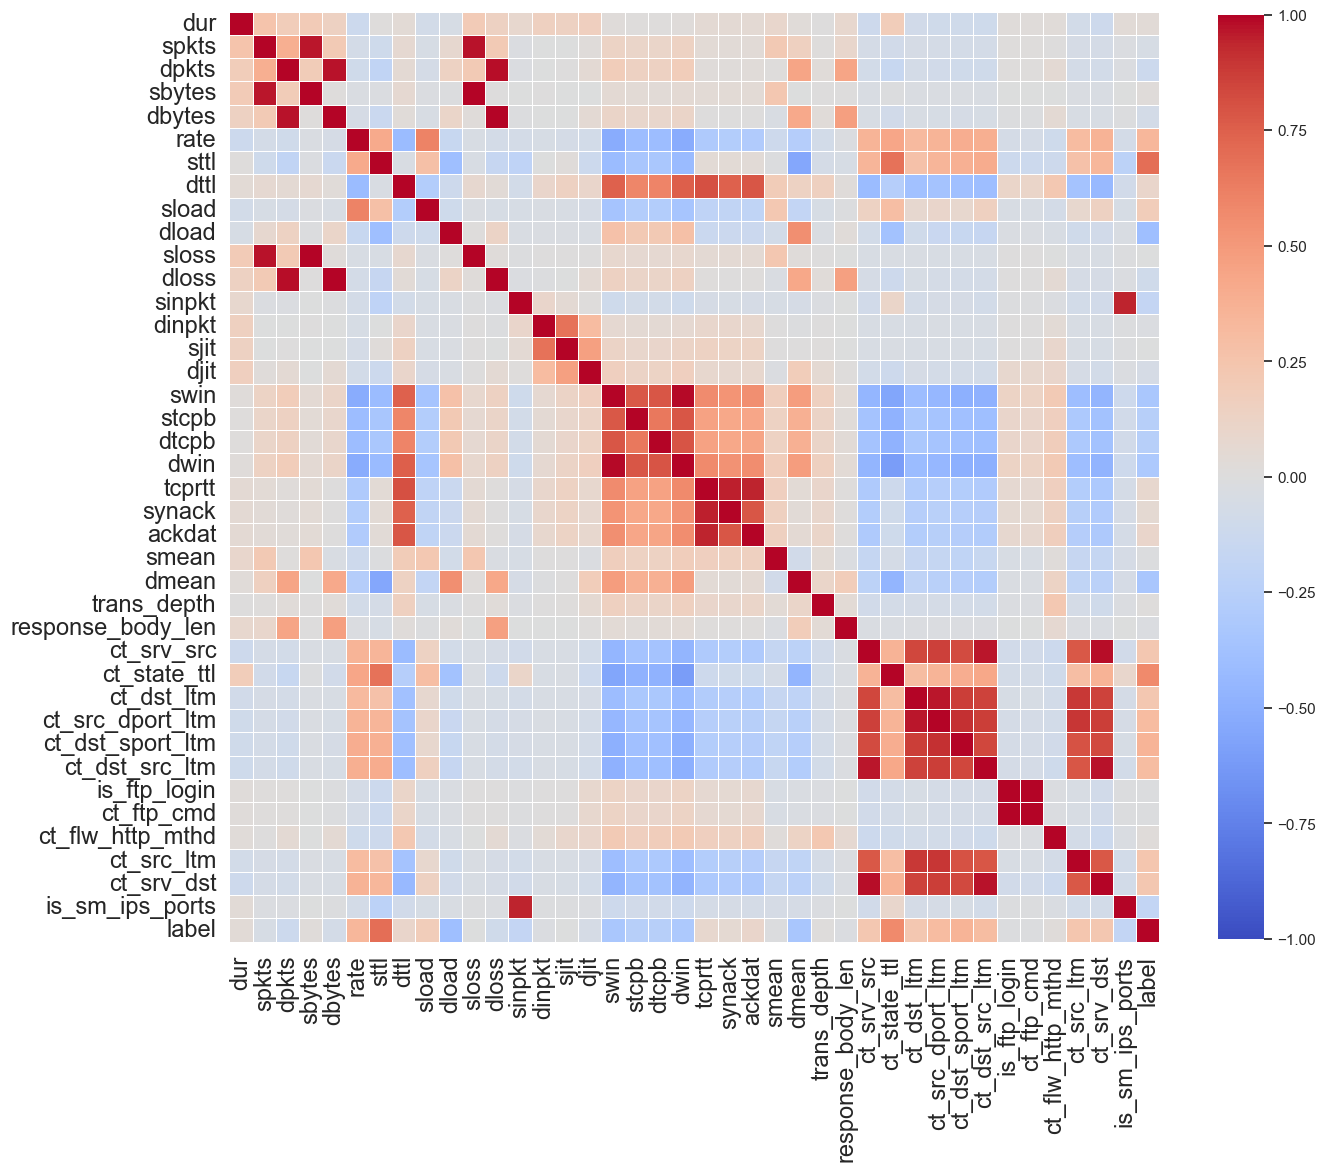

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = dtrain.corr()

plt.figure(figsize=(15, 15))  # Aumentar o tamanho da figura para comportar todas as labels
sns.set(font_scale=1.0)  # Ajustar o tamanho da fonte se necessário

heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,                # Remove as anotações dos valores nas células
    cmap='coolwarm',            # Paleta de cores
    vmin=-1, vmax=1,            # Limites da barra de cores
    center=0,                   # Centro da paleta de cores
    square=True,                # Células quadradas
    linewidths=0.5,             # Largura das linhas entre as células
    cbar_kws={"shrink": 0.8},   # Configuração da barra de cores
    xticklabels=correlation_matrix.columns,  # Exibir todos os labels das colunas
    yticklabels=correlation_matrix.columns   # Exibir todos os labels das linhas
)

# Ajuste final do tamanho da fonte dos eixos
plt.xticks(fontsize=17, rotation=90)  # Rotaciona as labels do eixo X para 90º
plt.yticks(fontsize=17)
plt.show()


In [41]:
num_features = dtrain.shape[1]

print(f"Número de features: {num_features}")

Número de features: 43


In [42]:
#como temos as features proto, service e state como categóricas, temos que transformálas em binários
#one hot enconder

dtrain_final = pd.get_dummies(dtrain, columns = ['proto', 'service', 'state'])

In [43]:
dtrain_final.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


In [44]:
from imblearn.over_sampling import SMOTE
# Separar os preditores (features) das classes alvo
X = dtrain_final.drop('label', axis=1)  # Excluindo a coluna 'label' para obter apenas os preditores
y = dtrain_final['label']  # A coluna 'label' contém as classes alvo

# Instanciar o SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE para balancear as classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Converter os dados balanceados em DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['label'])  # Se 'label' for o nome da sua coluna alvo

# Juntar os dados balanceados em um novo DataFrame
balanced_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Verificar as dimensões do novo DataFrame
print("Dimensões do DataFrame balanceado:", balanced_data.shape)

# Exibir as primeiras linhas do novo DataFrame
print(balanced_data.head())

c:\Users\natha\Documents\AgentesML\python\ai_runner\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\natha\Documents\AgentesML\python\ai_runner\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Dimensões do DataFrame balanceado: (238682, 195)
        dur  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
0  0.121478      6      4     258     172  74.087490   252   254   
1  0.649902     14     38     734   42014  78.473372    62   252   
2  1.623129      8     16     364   13186  14.170161    62   252   
3  1.681642     12     12     628     770  13.677108    62   252   
4  0.449454     10      6     534     268  33.373826   254   252   

          sload          dload  ...  state_CON  state_ECO  state_FIN  \
0  14158.942380    8495.365234  ...          0          0          1   
1   8395.112305  503571.312500  ...          0          0          1   
2   1572.271851   60929.230470  ...          0          0          1   
3   2740.178955    3358.622070  ...          0          0          1   
4   8561.499023    3987.059814  ...          0          0          1   

   state_INT  state_PAR  state_REQ  state_RST  state_URN  state_no  label  
0          0          0          

Text(0.5, 1.0, 'class distribution of train dataset')

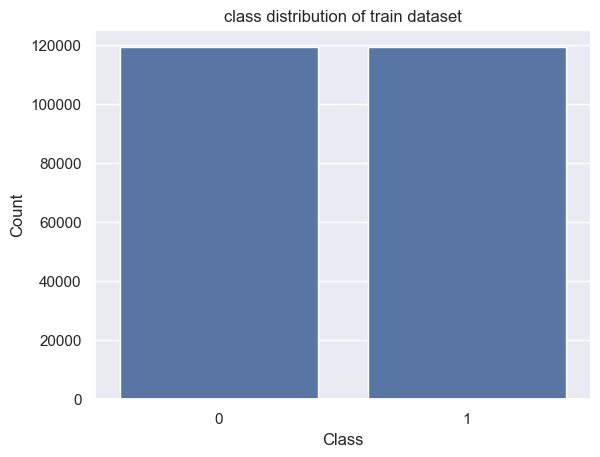

In [45]:
dist = sb.countplot(x='label', data=balanced_data)
dist.set(xlabel="Class", ylabel="Count")
plt.title("class distribution of train dataset")

In [15]:
balanced_data.to_csv('dadostreino.csv', index = False)